In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("TRAIN5.csv", index_col = 0)
df.head(2)

,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
carat,,,,,,,,,,,,,,,,,,,,,
0.30,62.4,58.0,4.31,4.28,2.68,6.353,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1.01,62.7,56.0,6.42,6.46,4.04,9.183,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# Reparto de datos en train y test
# ==============================================================================
# Lo primero que hacemos es definir cuál es nuestra variable Y y nuestras variables X
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


In [5]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())



Datos de entrenamiento
-----------------------
count    32364.000000
mean         7.786349
std          1.018371
min          5.787000
25%          6.851000
50%          7.784000
75%          8.584000
max          9.842000
Name: price, dtype: float64


In [6]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    8091.000000
mean        7.773714
std         1.010634
min         5.814000
25%         6.851500
50%         7.761000
75%         8.572500
max         9.842000
Name: price, dtype: float64


In [8]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 11.7 µs


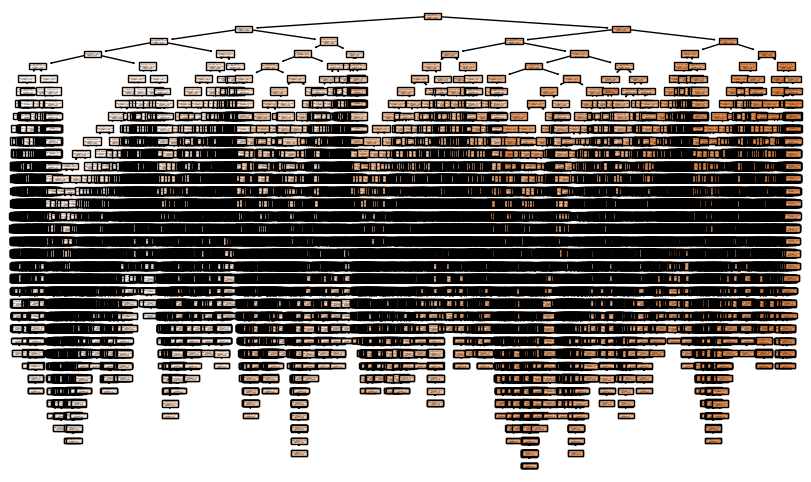

In [9]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

In [10]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.0

In [11]:
# max depth

print(regressor.tree_.max_depth)

36


In [12]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [13]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df
    

In [14]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.091003,0.018510,0.136051,0.981875,test,Decission Tree I
1,0.000224,0.000017,0.004178,0.999983,train,Decission Tree I


In [15]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [4, 5, 6, 7],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4,5,6]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=3,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [16]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 7 µs, sys: 6 µs, total: 13 µs
Wall time: 44.8 µs
Fitting 10 folds for each of 72 candidates, totalling 720 fits
[CV 1/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.900, test=-0.892) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.775, test=-0.780) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.802, test=-0.814) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.320, test=-0.332) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.983, test=-0.980) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.985, test=-0.995) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=1, min_samples_split=10;, score=(train=-0.238, test=-0.247) total time=   0.0s
[CV 8/10] END max_depth=4, max_features

[CV 7/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.266, test=-0.270) total time=   0.0s
[CV 8/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.897, test=-0.901) total time=   0.0s
[CV 9/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.257, test=-0.257) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=3, min_samples_split=50;, score=(train=-0.555, test=-0.556) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.293, test=-0.289) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.199, test=-0.202) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.214, test=-0.217) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=3, min_samples_split=100;, score=(train=-0.128, test=-0.126) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=3, 

[CV 9/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.165, test=-0.160) total time=   0.0s
[CV 10/10] END max_depth=4, max_features=6, min_samples_split=10;, score=(train=-0.105, test=-0.107) total time=   0.0s
[CV 1/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.077, test=-0.079) total time=   0.0s
[CV 2/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.081, test=-0.078) total time=   0.0s
[CV 3/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.071, test=-0.073) total time=   0.0s
[CV 4/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.078, test=-0.076) total time=   0.0s
[CV 5/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.068, test=-0.068) total time=   0.0s
[CV 6/10] END max_depth=4, max_features=6, min_samples_split=50;, score=(train=-0.126, test=-0.126) total time=   0.0s
[CV 7/10] END max_depth=4, max_features=6, min_

[CV 1/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.232, test=-0.232) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.259, test=-0.260) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.179, test=-0.181) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.942, test=-0.963) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.153, test=-0.151) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.199, test=-0.207) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.364, test=-0.380) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=2, min_samples_split=100;, score=(train=-0.682, test=-0.688) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=

[CV 1/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.068, test=-0.070) total time=   0.0s
[CV 2/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.092, test=-0.092) total time=   0.0s
[CV 3/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.202, test=-0.215) total time=   0.0s
[CV 4/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.090, test=-0.093) total time=   0.0s
[CV 5/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.105, test=-0.105) total time=   0.0s
[CV 6/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.370, test=-0.385) total time=   0.0s
[CV 7/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.167, test=-0.173) total time=   0.0s
[CV 8/10] END max_depth=5, max_features=5, min_samples_split=50;, score=(train=-0.064, test=-0.064) total time=   0.0s
[CV 9/10] END max_depth=5, max_features=5, min_s

[CV 5/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.658, test=-0.642) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.423, test=-0.423) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.191, test=-0.200) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.120, test=-0.123) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.902, test=-0.866) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=1, min_samples_split=100;, score=(train=-0.247, test=-0.243) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.284, test=-0.283) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=2, min_samples_split=10;, score=(train=-0.199, test=-0.193) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=2

[CV 5/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.059, test=-0.060) total time=   0.0s
[CV 6/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.097, test=-0.104) total time=   0.0s
[CV 7/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.072, test=-0.077) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.123, test=-0.121) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.065, test=-0.065) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=4, min_samples_split=50;, score=(train=-0.074, test=-0.075) total time=   0.0s
[CV 1/10] END max_depth=6, max_features=4, min_samples_split=100;, score=(train=-0.099, test=-0.101) total time=   0.0s
[CV 2/10] END max_depth=6, max_features=4, min_samples_split=100;, score=(train=-0.061, test=-0.064) total time=   0.0s
[CV 3/10] END max_depth=6, max_features=4, mi

[CV 7/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.059, test=-0.063) total time=   0.0s
[CV 8/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.056, test=-0.058) total time=   0.0s
[CV 9/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.061, test=-0.060) total time=   0.0s
[CV 10/10] END max_depth=6, max_features=6, min_samples_split=100;, score=(train=-0.069, test=-0.072) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.407, test=-0.427) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.261, test=-0.260) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.252, test=-0.257) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=1, min_samples_split=10;, score=(train=-0.112, test=-0.120) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=1, 

[CV 6/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.069, test=-0.070) total time=   0.0s
[CV 7/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.267, test=-0.288) total time=   0.0s
[CV 8/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.415, test=-0.426) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.068, test=-0.073) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=3, min_samples_split=50;, score=(train=-0.465, test=-0.463) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=3, min_samples_split=100;, score=(train=-0.079, test=-0.082) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=3, min_samples_split=100;, score=(train=-0.149, test=-0.152) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=3, min_samples_split=100;, score=(train=-0.074, test=-0.072) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=3, m

[CV 8/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.119, test=-0.125) total time=   0.0s
[CV 9/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.048, test=-0.046) total time=   0.0s
[CV 10/10] END max_depth=7, max_features=5, min_samples_split=100;, score=(train=-0.054, test=-0.057) total time=   0.0s
[CV 1/10] END max_depth=7, max_features=6, min_samples_split=10;, score=(train=-0.102, test=-0.104) total time=   0.0s
[CV 2/10] END max_depth=7, max_features=6, min_samples_split=10;, score=(train=-0.050, test=-0.051) total time=   0.0s
[CV 3/10] END max_depth=7, max_features=6, min_samples_split=10;, score=(train=-0.116, test=-0.120) total time=   0.0s
[CV 4/10] END max_depth=7, max_features=6, min_samples_split=10;, score=(train=-0.061, test=-0.062) total time=   0.0s
[CV 5/10] END max_depth=7, max_features=6, min_samples_split=10;, score=(train=-0.047, test=-0.050) total time=   0.0s
[CV 6/10] END max_depth=7, max_features=6, m

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 5, 6, 7],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [17]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree


DecisionTreeRegressor(max_depth=7, max_features=6, min_samples_split=50)

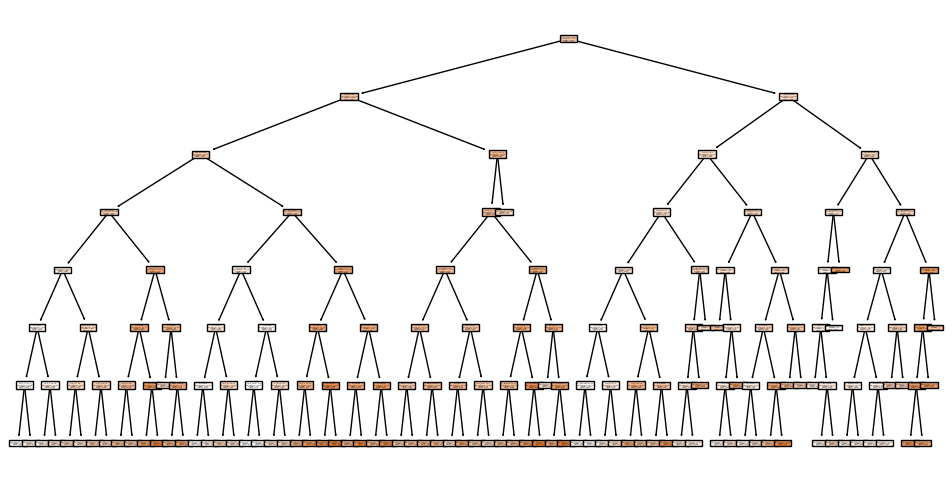

In [18]:
# volvamos a intentar visualizar el árbol a ver como se ve: 

fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);



In [19]:
 #guardamos la imagen 

fig.savefig("decision_tree1.png", facecolor="white")

In [20]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- clarity_VVS1 <= 0.50
|   |--- color_J <= 0.50
|   |   |--- table <= 56.25
|   |   |   |--- z <= 3.47
|   |   |   |   |--- y <= 4.99
|   |   |   |   |   |--- z <= 2.85
|   |   |   |   |   |   |--- clarity_IF <= 0.50
|   |   |   |   |   |   |   |--- value: [6.49]
|   |   |   |   |   |   |--- clarity_IF >  0.50
|   |   |   |   |   |   |   |--- value: [6.80]
|   |   |   |   |   |--- z >  2.85
|   |   |   |   |   |   |--- clarity_IF <= 0.50
|   |   |   |   |   |   |   |--- value: [6.80]
|   |   |   |   |   |   |--- clarity_IF >  0.50
|   |   |   |   |   |   |   |--- value: [7.13]
|   |   |   |   |--- y >  4.99
|   |   |   |   |   |--- clarity_VVS2 <= 0.50
|   |   |   |   |   |   |--- color_I <= 0.50
|   |   |   |   |   |   |   |--- value: [7.39]
|   |   |   |   |   |   |--- color_I >  0.50
|   |   |   |   |   |   |   |--- value: [7.11]
|   |   |   |   |   |--- clarity_VVS2 >  0.50
|   |   |   |   |   |   |--- color_H <= 0.50
|   |   |   |   |   |   |   |--- value: [7.70]
|   |   |   | 

In [21]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)


In [22]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [23]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.266290,0.139674,0.37373,0.863233,test,Decision tree II
1,0.259312,0.132896,0.36455,0.871851,train,Decision tree II


# prueba predicciones 

In [26]:
df = pd.read_csv("realidad5.csv", index_col = 0)
X_realida = df


In [27]:
X_realida_submision = best_tree.predict(X_realida)
X_realida_submision

array([6.3273633 , 8.36132295, 9.1495248 , ..., 6.48871474, 9.1495248 ,
       8.36132295])

In [28]:
submision1 = pd.DataFrame(X_realida_submision)
submision1.reset_index(inplace=True)
submision1.rename(columns={"index":"id",0:"price"}, inplace =True)
submision1

,id,price
0,0,6.327363
1,1,8.361323
2,2,9.149525
3,3,8.077520
4,4,9.415644
...,...,...
13480,13480,8.361323
13481,13481,8.361323
13482,13482,6.488715
13483,13483,9.149525


In [29]:
submision1.to_csv("valen5.csv", index=False)